# GPR to predict the number of atoms
## input spectra, for predict Cu,Te seperately and predict them both 
## input 1st and/or 2nd derivative data to predict Cu,Te together
### summary: for individual predict, spectra better predict Te, derivate better predict Cu; If predict Cu and Te together, using first derivative data will give the best result. 

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

use 500 random data to do the Machine Learning

single output*(predict Num Cu)

In [57]:
df = pd.read_csv('mu_cn10000.csv')
df

,CN,Num Cu,Num Te,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.920706,5.641016,4.279690,0.030303,0.032757,0.035112,0.037475,0.039958,0.042668,0.045714,...,0.994119,0.995957,0.998090,1.000540,1.003327,1.006472,1.009996,1.013918,1.018260,1.023043
1,9.038954,4.685766,4.353189,0.031529,0.034154,0.036671,0.039203,0.041875,0.044810,0.048132,...,0.999269,1.000942,1.002782,1.004773,1.006900,1.009148,1.011502,1.013947,1.016467,1.019047
2,9.725820,5.599930,4.125890,0.030576,0.033095,0.035505,0.037921,0.040456,0.043223,0.046335,...,0.994823,0.997591,1.000637,1.003974,1.007616,1.011577,1.015872,1.020514,1.025518,1.030897
3,9.374672,5.139779,4.234893,0.030891,0.033427,0.035861,0.038308,0.040883,0.043703,0.046883,...,0.999852,1.002114,1.004576,1.007246,1.010132,1.013241,1.016581,1.020158,1.023981,1.028057
4,9.599938,5.271755,4.328182,0.031077,0.033681,0.036170,0.038665,0.041287,0.044156,0.047393,...,0.998475,1.000035,1.001807,1.003776,1.005926,1.008242,1.010709,1.013311,1.016034,1.018861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.360022,5.084340,4.275681,0.030950,0.033483,0.035915,0.038363,0.040943,0.043770,0.046960,...,1.001789,1.003715,1.005820,1.008111,1.010590,1.013262,1.016131,1.019201,1.022478,1.025964
9996,9.758551,5.435938,4.322612,0.030927,0.033519,0.035994,0.038473,0.041074,0.043918,0.047124,...,1.000563,1.002288,1.004220,1.006344,1.008645,1.011110,1.013723,1.016471,1.019338,1.022312
9997,10.181228,6.181228,4.000000,0.030587,0.033143,0.035582,0.038020,0.040572,0.043356,0.046485,...,0.992527,0.996200,1.000256,1.004671,1.009423,1.014490,1.019850,1.025479,1.031355,1.037456
9998,10.156260,6.020380,4.135880,0.030699,0.033247,0.035682,0.038120,0.040676,0.043465,0.046604,...,0.994741,0.997739,1.001036,1.004613,1.008451,1.012532,1.016838,1.021350,1.026048,1.030916


In [157]:
features=np.array(df.loc[:,'Mu1':'Mu100'])
#y = np.array(df["Num Cu"])
labels = np.array(df['CN'])
print('The shape of our features is:', features.shape)
print('The shape of our labels is:', labels.shape)

The shape of our features is: (10000, 100)
The shape of our labels is: (10000,)


# Smooth noise spectrum

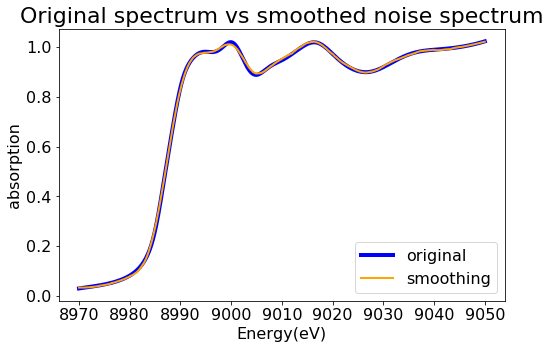

In [154]:
plt.rcParams.update({'font.size': 16})
xs = np.linspace(8970, 9050, 1000)
energies = np.linspace(8970, 9050, 100)
s1 = UnivariateSpline(energies, features[0], s=0)
y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
noise = np.random.normal(0,0.015,1000)
y2= y1+ noise
ysmooth = savgol_filter(y2, 101, 2)
fig, (ax2) = plt.subplots(1, 1,figsize=(8,5), sharex = False, sharey = False, )
#ax1.plot(xs,y2,color = 'blue', label='with noise' )#noise
#ax1.plot(xs,y1,color = 'orange' ,label='without noise', linewidth=3 )# without noise


ax2.plot(xs,y1,color = 'blue' ,label='original', linewidth=4 )# without noise
ax2.plot(xs,ysmooth, color='orange',label='smoothing', linewidth=2)#smooth
#ax1.set_title('without noise vs with noise  without normalization', fontsize = 22)
ax2.set_title('Original spectrum vs smoothed noise spectrum',  fontsize = 22)
plt.xlabel('Energy(eV)')
plt.ylabel('absorption')
plt.legend()
plt.show()
#fig.savefig('noise_plot.svg', format='svg', dpi=1200)

The above spectrum is a example with noise 

## 1. create noise for all the 10000 sample
## 2. use specta with noise to get the 1 & 2 derivate 
## 3. use spectra with all energy-mu points 
## 4. use 1&2 derivate to predict CN 


In [327]:
def GPR_get_CN(features, labels):
    #parameter: features, labels
    # Using Skicit-learn to split data into training and testing sets
    from sklearn.model_selection import train_test_split
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    # Import the model we are using
    import sklearn.gaussian_process as gp
    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    gpr = model.fit(train_features, train_labels)
    params = model.kernel_.get_params()
    pred_labels, std = model.predict(test_features, return_std=True)
    MSE = ((pred_labels-test_labels)**2).mean()
    print('RMSE = ' ,np.sqrt(MSE))
    print('R Squared :', r2_score(test_labels, pred_labels))

In [592]:
# This function generate a spectrum with given noise, and then smoothed it
# And generate the 1st, 2nd derivatives
def add_noise_and_smooth(df, noise_std=0.01):
    
    if 'Mu1' in df.columns:
        features=np.array(df.loc[:,'Mu1':'Mu100'])
    else:
        features=np.array(df)
            
    xs = np.linspace(8970, 9050, 1000)
    energies = np.linspace(8970, 9050, 100)
    
    
    smoothed_spectrum_array = np.empty([500,1000])
    for i in range(features.shape[0]):
        s1 = UnivariateSpline(energies, features[i], s=0)
        y1 = s1(xs) # generate a line with 1000 data, the amount of data depend on the xs num the third parameter
        noise = np.random.normal(0,noise_std*np.std(y1),1000)
        y2 = y1+ noise
        # smooth twice
        ysmooth = savgol_filter(y2, 101, 2)
        ysmooth_twiced = savgol_filter(ysmooth, 101, 2)
        #ysmooth_twiced_array = np.array([])
        smoothed_spectrum_array[i] = ysmooth_twiced
        
    
    # get first derivatives
    for i in range(1000):
        y = smoothed_spectrum_array[:i+1]
        x = xs
        first_derivatives = np.diff(y)/np.diff(x) 
    
    
    # get second derivatives
    for i in range(999):
        
        # first, smooth 1st derivatives
        first_smooth = savgol_filter(first_derivatives_df[:i+1], 101, 2)
        
        y = first_derivatives[:i+1]
        x = xs[:-1]
        second_derivatives = np.diff(y)/np.diff(x) 
    
        
        
    return smoothed_spectrum_array, first_derivatives, second_derivatives

In [599]:
smoothed_spectrum_array, first_derivatives_array, second_derivatives_array = add_noise_and_smooth(df[:500], noise_std=0.05)

In [600]:
GPR_get_CN(features = smoothed_spectrum_array, labels = np.array(df[:500]['CN']))
GPR_get_CN(features = smoothed_spectrum_array, labels = np.array(df[:500]['Num Cu']))
GPR_get_CN(features = smoothed_spectrum_array, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
RMSE =  0.13440636164011044
R Squared : 0.9248723314871139
Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
RMSE =  0.14095405448548257
R Squared : 0.9469936870635329
Training Features Shape: (375, 1000)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1000)
Testing Labels Shape: (125,)
RMSE =  0.026943403291394937
R Squared : 0.983835159264473


In [601]:
GPR_get_CN(features = first_derivatives_array, labels = np.array(df[:500]['CN']))
GPR_get_CN(features = first_derivatives_array, labels = np.array(df[:500]['Num Cu']))
GPR_get_CN(features = first_derivatives_array, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 999)
Training Labels Shape: (375,)
Testing Features Shape: (125, 999)
Testing Labels Shape: (125,)
RMSE =  0.19125855374068326
R Squared : 0.8478745078776091
Training Features Shape: (375, 999)
Training Labels Shape: (375,)
Testing Features Shape: (125, 999)
Testing Labels Shape: (125,)
RMSE =  0.19492293468976085
R Squared : 0.8986325938825065
Training Features Shape: (375, 999)
Training Labels Shape: (375,)
Testing Features Shape: (125, 999)
Testing Labels Shape: (125,)
RMSE =  0.03473440489075296
R Squared : 0.9731350367053845


In [602]:
GPR_get_CN(features = second_derivatives_array, labels = np.array(df[:500]['CN']))
GPR_get_CN(features = second_derivatives_array, labels = np.array(df[:500]['Num Cu']))
GPR_get_CN(features = second_derivatives_array, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 998)
Training Labels Shape: (375,)
Testing Features Shape: (125, 998)
Testing Labels Shape: (125,)
RMSE =  0.3011429899370253
R Squared : 0.6228572378764601
Training Features Shape: (375, 998)
Training Labels Shape: (375,)
Testing Features Shape: (125, 998)
Testing Labels Shape: (125,)
RMSE =  0.2791378147390319
R Squared : 0.7921213923330926
Training Features Shape: (375, 998)
Training Labels Shape: (375,)
Testing Features Shape: (125, 998)
Testing Labels Shape: (125,)
RMSE =  0.06788106529104648
R Squared : 0.8973961102776982


In [603]:
# concat 1st, 2nd derivatives
first_and_second=np.empty((500, 1997))
for i in range(500):
    first_and_second[i] = np.concatenate((first_derivatives_array[i], second_derivatives_array[i]), axis = 0)

In [604]:
GPR_get_CN(features = first_and_second, labels = np.array(df[:500]['CN']))
GPR_get_CN(features = first_and_second, labels = np.array(df[:500]['Num Cu']))
GPR_get_CN(features = first_and_second, labels = np.array(df[:500]['Num Te']))

Training Features Shape: (375, 1997)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1997)
Testing Labels Shape: (125,)
RMSE =  0.23003670823165215
R Squared : 0.7799331890502132
Training Features Shape: (375, 1997)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1997)
Testing Labels Shape: (125,)
RMSE =  0.22815763833787586
R Squared : 0.8611191146417176
Training Features Shape: (375, 1997)
Training Labels Shape: (375,)
Testing Features Shape: (125, 1997)
Testing Labels Shape: (125,)
RMSE =  0.040485353533395656
R Squared : 0.9635025603817023


# -------------------------------------------------

In [146]:
after_smooth_first500=pd.DataFrame(after_smooth_10000)
after_smooth_first500

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.028242,0.028788,0.029323,0.029849,0.030365,0.030872,0.031369,0.031856,0.032334,0.032801,...,1.017292,1.018341,1.019428,1.020555,1.021720,1.022925,1.024169,1.025452,1.026773,1.028134
1,0.033592,0.033615,0.033646,0.033685,0.033732,0.033787,0.033850,0.033921,0.034000,0.034087,...,1.015378,1.015771,1.016171,1.016578,1.016991,1.017412,1.017839,1.018274,1.018715,1.019163
2,0.033434,0.033473,0.033519,0.033570,0.033628,0.033692,0.033762,0.033838,0.033921,0.034009,...,1.022518,1.022899,1.023270,1.023633,1.023988,1.024333,1.024669,1.024997,1.025316,1.025626
3,0.032357,0.032045,0.031759,0.031498,0.031262,0.031052,0.030868,0.030709,0.030575,0.030468,...,1.024380,1.024342,1.024276,1.024180,1.024055,1.023900,1.023717,1.023504,1.023262,1.022991
4,0.030347,0.030518,0.030697,0.030884,0.031080,0.031284,0.031496,0.031716,0.031944,0.032181,...,1.020520,1.020827,1.021121,1.021401,1.021668,1.021921,1.022160,1.022386,1.022599,1.022798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.025928,0.026458,0.026977,0.027485,0.027982,0.028469,0.028946,0.029411,0.029866,0.030310,...,1.018413,1.019572,1.020781,1.022039,1.023347,1.024704,1.026111,1.027567,1.029073,1.030628
496,0.029379,0.029563,0.029754,0.029951,0.030153,0.030362,0.030577,0.030798,0.031025,0.031258,...,1.008088,1.008149,1.008201,1.008246,1.008283,1.008313,1.008336,1.008350,1.008358,1.008357
497,0.035203,0.035558,0.035902,0.036236,0.036560,0.036874,0.037178,0.037472,0.037756,0.038030,...,1.014262,1.014680,1.015100,1.015522,1.015946,1.016371,1.016799,1.017229,1.017660,1.018094
498,0.026366,0.027129,0.027862,0.028566,0.029241,0.029886,0.030503,0.031090,0.031648,0.032177,...,1.017693,1.017826,1.017953,1.018074,1.018189,1.018297,1.018398,1.018494,1.018583,1.018665
